
## Use of Machine Learning to Generate and Classify Fractal Shapes

#### Muhannad Alabdullateef
#### Hilderbrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
##### [Twitter](https://twitter.com/mhnd_95) | [GitHub](https://github.com/Mhnd95) | [GoogleScholar](https://scholar.google.com/citations?user=69cHE_wAAAAJ&hl=en&authuser=2) | [LinkedIn](https://www.linkedin.com/in/muhannad-alabdullateef/)

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Misael Morales, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/misaelmmorales/)


### Executive Summary

Fractal shapes are one of the most fascinating things that can be seen with the human eye, but can machines see them? The purpose of this project is to generate, train and classify 3 classes of fractal shapes from randomly generated pictures and then classify them from an existing class list. After running the code, it is apparent that a larger training pool is required and a more robust code is recommended. 


### Import Packages

In [1]:
import os                                                           # To work with create and modify folders
import numpy as np                                                  # To work with data and arrays
import matplotlib.pyplot as plt                                     # To generate the random shapes
import cv2
import tensorflow as tf                                             # To be be able to analyze the generated pictures
from tensorflow.python.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

### Functions

#### The following functions will be used in the workflow.

To generate Mandelbrot Fractal shape and save them as pictures from 1 to 10.

In [ ]:
def mandelbrot_image(width, height, max_iter, x_center=0.0, y_center=0.0, x_width=3.5, y_width=2.0):
    pixel_array = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            zx, zy = x_center + x * (x_width / width) - x_width/2, y_center + y * (y_width / height) - y_width/2
            c = zx + zy * 1j
            z = c
            for i in range(max_iter):
                if abs(z) > 2.0:
                    break 
                z = z * z + c
            pixel_array[y, x] = i
    return pixel_array

# Ensure the directory exists
output_dir = 'data/mandelbrot_set'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#It takes about 5 minutes to generate 10 images using this code
for i in range(10):
    image = mandelbrot_image(800, 800, 1000, x_center=np.random.uniform(-0.7, 0.7), y_center=np.random.uniform(-0.7, 0.7))
    plt.imsave(os.path.join(output_dir, f'mandelbrot_{i}.png'), image, cmap='twilight_shifted')

^ This function would generate the **Mandelbrot set** of fractal shapes and save them as images in the appropriate folder.

To generate Julia Fractal shape and save them as pictures from 1 to 10.

In [ ]:
def julia_image(width, height, max_iter, cx, cy):
    pixel_array = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            zx, zy = x * (3.5 / width) - 2.5, y * (2.0 / height) - 1.0
            c = complex(cx, cy)
            z = complex(zx, zy)
            for i in range(max_iter):
                if abs(z) > 2.0:
                    break 
                z = z * z + c
            pixel_array[y, x] = i
    return pixel_array

# Ensure the directory exists
output_dir = 'data/julia_set'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i in range(10):
    cx, cy = np.random.uniform(-0.8, 0.8), np.random.uniform(-0.8, 0.8)
    image = julia_image(800, 800, 1000, cx, cy)
    plt.imsave(os.path.join(output_dir, f'julia_{i}.png'), image, cmap='twilight_shifted')

^ This function would generate the **Julia set** of fractal shapes and save them as images in the same directory.

To generate Koch Snowflake Fractal shape and save them as pictures from 1 to 10.

In [ ]:
def koch_snowflake(iterations):
    def koch_snowflake_recursion(p1, p2, iterations):
        if iterations == 0:
            xs = [p1[0], p2[0]]
            ys = [p1[1], p2[1]]
            return xs, ys

        # Calculate third points
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        a = (p1[0] + dx / 3, p1[1] + dy / 3)
        c = (p1[0] + 2 * dx / 3, p1[1] + 2 * dy / 3)
        b = (p1[0] + 0.5 * dx - np.sqrt(3) * 0.5 * dy / 3, 
             p1[1] + 0.5 * dy + np.sqrt(3) * 0.5 * dx / 3)

        xs1, ys1 = koch_snowflake_recursion(p1, a, iterations-1)
        xs2, ys2 = koch_snowflake_recursion(a, b, iterations-1)
        xs3, ys3 = koch_snowflake_recursion(b, c, iterations-1)
        xs4, ys4 = koch_snowflake_recursion(c, p2, iterations-1)

        return xs1 + xs2 + xs3 + xs4, ys1 + ys2 + ys3 + ys4

    # Initialize triangle
    p1 = (0, 0)
    p2 = (0.5, np.sqrt(3) / 2)
    p3 = (1, 0)

    xs1, ys1 = koch_snowflake_recursion(p1, p2, iterations)
    xs2, ys2 = koch_snowflake_recursion(p2, p3, iterations)
    xs3, ys3 = koch_snowflake_recursion(p3, p1, iterations)

    xs = xs1 + xs2 + xs3
    ys = ys1 + ys2 + ys3

    return xs, ys

def save_koch_snowflake(iterations, i, output_dir):
    xs, ys = koch_snowflake(iterations)
    plt.figure(figsize=(8, 8))
    plt.fill(xs, ys, facecolor='cyan', edgecolor='blue')
    plt.axis('equal')
    # Save the figure to the specified directory
    plt.savefig(os.path.join(output_dir, f'koch_snowflake_{i}.png'))
    plt.close()

# Ensure the directory exists
output_dir = 'data/koch_snowflake_set'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Generate and save 10 Koch snowflake images
for i in range(10):
    save_koch_snowflake(4 + i % 3, i, output_dir)


^ This function would generate the **Koch Snowflake set** of fractal shapes and save them as images in the same directory.

### 1. Data Preparation

* Use the previously defined functions to generate i number of fractals (i = 10 was chosen in this case).

* The generated files should look like this:
    /data
        /mandlebrot_set
            /mandlebrot_0
            /mandlebrot_1
            .
            .
            /mandlebrot_i
        /julia_set
            /julia_0
            /julia_1
            .
            .
            /julia_i
        /koch_snowflake_set
            /koch_snowflake_0
            /koch_snowflake_1
            .
            .
            /koch_snowflake_i
  
* Sample each dataset by running the code below:

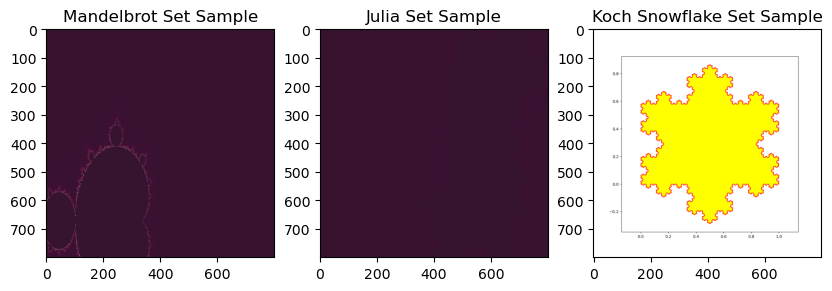

In [2]:
mandelbrot_sample = cv2.imread(os.path.join('data', 'mandelbrot_set', 'mandelbrot_5.png'))
julia_sample = cv2.imread(os.path.join('data', 'julia_set', 'julia_5.png'))
koch_snowflake_sample = cv2.imread(os.path.join('data', 'koch_snowflake_set', 'koch_snowflake_5.png'))

plt.figure(figsize = (10,50))
plt.subplot(1,3,1) 
plt.imshow(mandelbrot_sample)
plt.title('Mandelbrot Set Sample')
plt.subplot(1,3,2)
plt.imshow(julia_sample)
plt.title('Julia Set Sample')
plt.subplot(1,3,3)
plt.imshow(koch_snowflake_sample)
plt.title('Koch Snowflake Set Sample')
plt.show()


### 2. Data Augmentation and Preprocessing

* Use **'ImageDataGenerator'** for data augmentation and to load images:

In [ ]:
data_dir = 'data'
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,  # setting validation split
                                   rotation_range=10, zoom_range=0.1, width_shift_range=0.1,
                                   height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory(data_dir, target_size=(128, 128), batch_size=32,
    class_mode='categorical',  # Since we have more than 2 classes
    subset='training')
validation_generator = train_datagen.flow_from_directory(data_dir, target_size=(128, 128),
    batch_size=32, class_mode='categorical', subset='validation')

### 3. Define the CNN model

* Use **'tensorflow.keras'** to define the CNN model:


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 classes: Mandelbrot, Julia, Koch Snowflake
])

### 4. Compile and train the model

* Compile the model then use the generated images to train and test the model:


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 5. Evaluate

* Evaluate the accuracy of the model and save for later use:


In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
# Save the model
model.save('fractal_classifier.h5')



### Results

#### Fractal sets sample:

The code generated 10 of each fractal set and below is a sample of one from each set (shown sample was chosen based on clarity and not random):

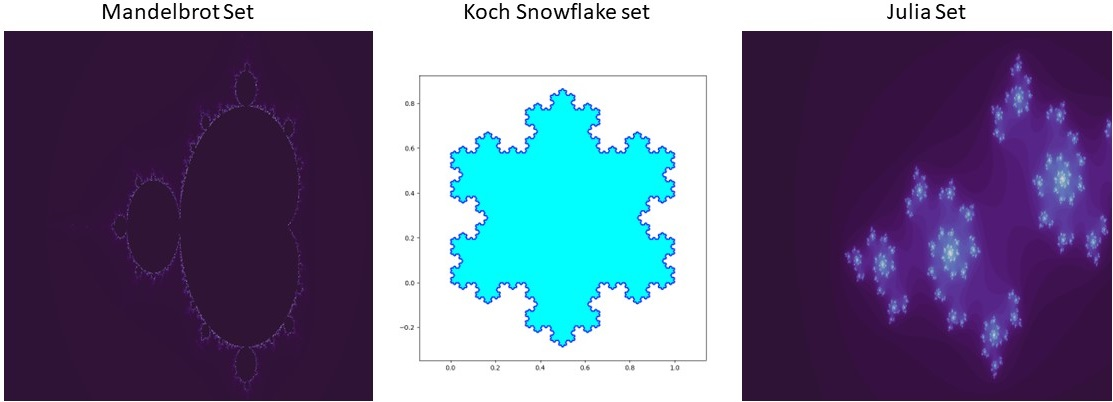

#### Model Summary:

After running the model, the following message was generated evaluating the accurace of the model:

1/1 [==============================] - 0s 358ms/step - loss: 1.0304 - accuracy: 0.3333
Validation accuracy: 33.33%

* Based on those results, the model seem to be as accurate as random guess at (1/3) chance of correctness. The following are further areas of exploration on how to improve:
1. Use of a more robust image processing neural network function.
2. Generation of higher number of training set 100s, 1,000s or maybe 1,000,000s images might be required for such simple code.
3. Building a more easily recognizable shape (Triangle vs Circle) and gradually increase the complexity of shapes.

### Parting Comments / Promote You

* First time trying machine learning, almost all of the project was possible thanks to Dr. Pyrcz's class.